In [38]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Grouped Bar Chart: Compare the average rating and total review count for the top 10 app categories by number of installs.
# Filter out categories with an average rating below 4.0, size below 10 MB, and last update not in January.
# This graph should be displayed only between 3 PM IST and 5 PM IST.

In [ ]:
import pytz
from datetime import datetime

In [ ]:
ist = pytz.timezone('Asia/Kolkata')
current_time_ist = datetime.now(ist).time()
print({current_time_ist})

{datetime.time(19, 51, 9, 299455)}


In [39]:
data=pd.read_csv('cleaned_playstore_data.csv')

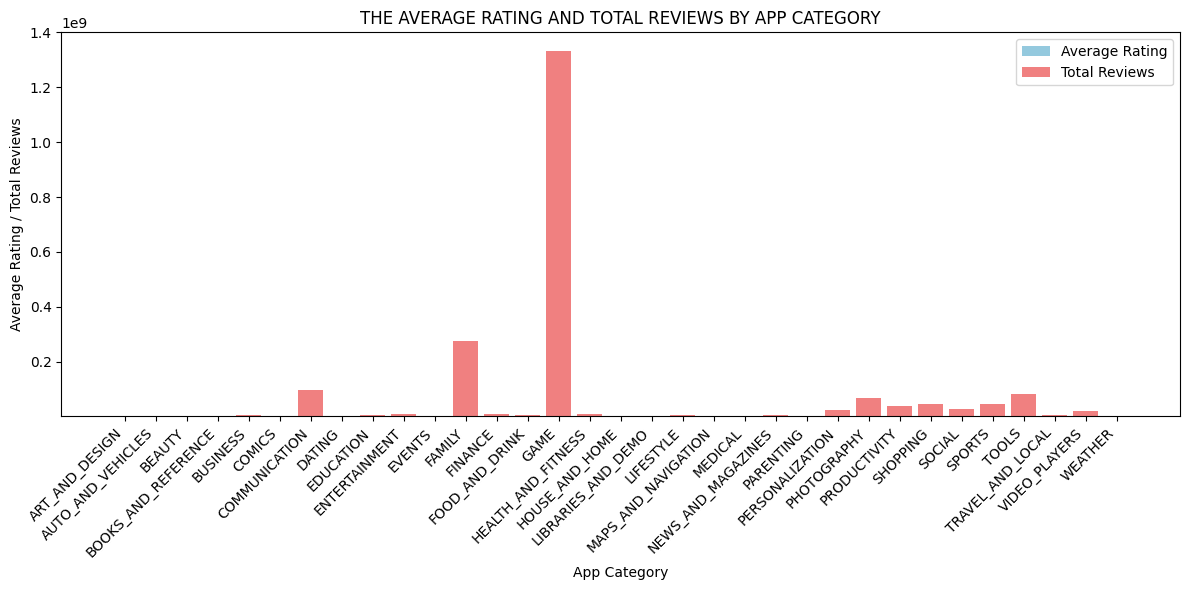

In [40]:
# Grouped Bar Chart: Compare the average rating and total review count for the top 10 app categories by number of installs Filter out categories with an average rating below 4.0, size below 10 MB, and last update not in January
#  This graph should be displayed only between 3 PM IST and 5 PM IST.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, time
data['Last Updated'] = pd.to_datetime(data['Last Updated'])

# Filter out categories
filtered_data = data[
    (data['Rating'] >= 4.0) &
    (data['Size'] >= 10000000) & # Assuming size is in bytes
    (data['Last Updated'].dt.month != 1)
]

# Group by category and aggregate
grouped_data = filtered_data.groupby('Category').agg(
    average_rating=('Rating', 'mean'),
    total_reviews=('Reviews', 'sum')
).reset_index()


# Create the grouped bar chart
plt.figure(figsize=(12, 6))

# Check current time in IST
now = datetime.now().astimezone()
current_time_ist = now.time()

if time(15, 0) <= current_time_ist <= time(17, 0): #Check if time is between 3 PM and 5 PM IST
    sns.barplot(x='Category', y='average_rating', data=grouped_data, label='Average Rating', color='skyblue')
    plt.bar(grouped_data['Category'], grouped_data['total_reviews'], bottom=grouped_data['average_rating'], label='Total Reviews', color='lightcoral')
    plt.xlabel('App Category')
    plt.ylabel('Average Rating / Total Reviews')
    plt.title('THE AVERAGE RATING AND TOTAL REVIEWS BY APP CATEGORY')
    plt.legend()
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
 print("Graph is  displayed only between 3 PM and 5 PM IST")
